In [52]:
import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt

In [53]:
#realizando leitura de arquivo em formato Excel
estban = pd.read_excel(r'202007_ESTBAN.xlsx', engine='openpyxl')
df1 = pd.DataFrame(estban)

In [54]:
df1.info(65)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 66 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                              

In [55]:
#selecionando as colunas desejadas utilizando indice
colunas_por_indice = df1.iloc[:,[0,1,2,3,5,21,42,45,65]]

In [56]:
colunas_por_indice.head()

,#DATA_BASE,UF,CODMUN,MUNICIPIO,NOME_INSTITUICAO,VERBETE_160_OPERACOES_DE_CREDITO,VERBETE_420_DEPOSITOS_DE_POUPANCA,VERBETE_432_DEPOSITOS_A_PRAZO,CODMUN_IBGE
0,202007,AC,1030,MANCIO LIMA,BCO DO BRASIL S.A.,31365488.0,12227727.0,450618.0,1200336.0
1,202007,AC,5184,MANOEL URBANO,CAIXA ECONOMICA FEDERAL,14804063.0,10753219.0,350642.0,1200344.0
2,202007,AC,9465,ASSIS BRASIL,CAIXA ECONOMICA FEDERAL,6686748.0,4419528.0,236460.0,1200054.0
3,202007,AC,15978,FEIJO,BCO DO BRASIL S.A.,26411217.0,5816673.0,1413322.0,1200302.0
4,202007,AC,15978,FEIJO,CAIXA ECONOMICA FEDERAL,31061183.0,14990269.0,2625543.0,1200302.0


In [76]:
#filtrando estado 
dfmt = colunas_por_indice[colunas_por_indice['UF']=='MT']

municipio_filtrado = ['CANARANA','ARAPUTANGA']
dfmt = colunas_por_indice[colunas_por_indice['MUNICIPIO'].isin(municipio_filtrado)]

In [ ]:
my_report = sv.analyze(dfmt)
my_report.show_html()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


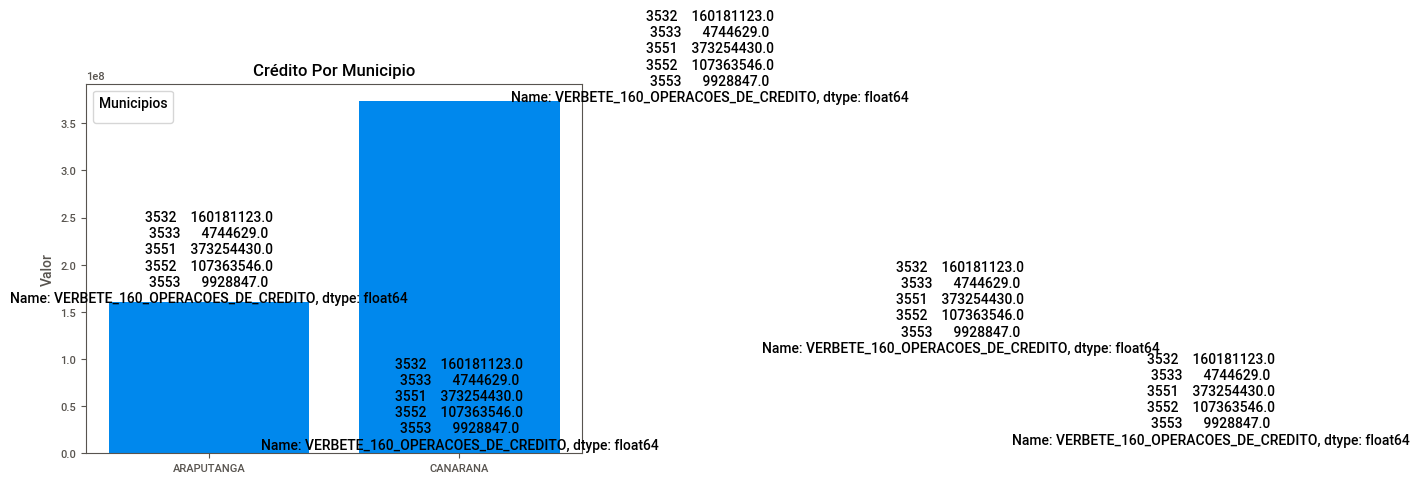

In [85]:
fig, ax = plt.subplots()

municipio = dfmt['MUNICIPIO']
credito = dfmt['VERBETE_160_OPERACOES_DE_CREDITO']


ax.bar(municipio, credito)

# Adicionando rótulos nos dados
for i, valor in enumerate(credito):
    plt.text(i, valor + 200000, str(credito), ha='center')  # Coloca o rótulo um pouco acima da barra

ax.set_ylabel('Valor')
ax.set_title('Crédito Por Municipio')
ax.legend(title='Municipios')

plt.show()